In [1]:
import torch

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
q_z = torch.arange(200000).reshape(10000, 20)
zs = torch.ones(10000).to(dtype=torch.int64).unsqueeze(-1)

In [5]:
%timeit q_z.gather(-1, zs)

174 µs ± 18 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [6]:
%timeit torch.take_along_dim(q_z, zs, dim=-1)

176 µs ± 6.5 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [3]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation
from matplotlib import animation
import torch
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
arr = [[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
 [1., 0.00819977, 0.01563222, 0.02042268, 0.07341602, 0.14595085, 1., 0.07005004, 0.53667768, 0.17173508, 0.22222301, 0.0180561, 1.],
 [1., 0.01213042, 0.02915084, 0.27925984, 0.3608159 , 0.6085987, 1., 0.39409791, 0.69004116, 0.39755   , 0.4712599 , 0.11003446, 1.],
 [1., 0.0321202 , 0.09618822, 0.28905639, 0.33901851, 0.77661133, 0.80872538, 0.82218993, 0.77667264, 0.93417123, 0.67317667, 0.0097801, 1.],
 [1., 0.02388454, 0.07614225, 0.17809316, 0.59356929, 0.68242618, 1., 0.83546395, 0.78560253, 0.95673491, 0.71557824, 0.56783263, 1.],
 [1., 0.00740841, 0.01222433, 0.08559934, 0.17228894, 0.22399429, 1., 0.71727138, 0.86137076, 0.98343354, 0.95827811, 0.40861893, 1.],
 [1., 1., 0.0082115 , 1., 1., 1., 1., 0.83671844, 0.93011212, 0.99430336, 0.91528726, 0.52119995, 1.],
 [1., 0.01015241, 0.01351551, 0.04073484, 0.2776242 , 0.31874874, 1., 1., 1., 0., 1., 1., 1.],
 [1., 0.05617865, 0.19442694, 0.05352032, 0.49329241, 0.35422324, 1., 0.95202471, 0.96401192, 0.99063532, 0.95769765, 0.63920464, 1.],
 [1., 0.16583091, 0.31585065, 0.12059095, 0.33051741, 0.74401397, 1., 0.92435535, 0.90065917, 0.9692101 , 0.95723856, 0.24880097, 1.],
 [1., 0.24905296, 0.34736175, 0.35189231, 0.7244571 , 0.71747022, 0.57957113, 0.89642405, 0.7422473 , 0.91220673, 0.81309519, 0.28960459, 1.],
 [1., 0.04075846, 0.25862192, 0.57850805, 0.71793048, 0.73340918, 1., 0.61997505, 0.66788481, 0.66540334, 0.31956919, 0.274743, 1.],
 [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]

In [5]:
arr2 = [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, -0.1253838688135147, -0.12143225967884064, -0.11898377537727356, -0.11536630243062973, -0.11088608205318451, 1.0, 0.021935654804110527, 0.12884709239006042, 0.07713627070188522, 0.16643521189689636, 0.17082491517066956, 1.0], [1.0, -0.12560269236564636, -0.12399021536111832, -0.11159221082925797, -0.09496357291936874, -0.08400633931159973, 1.0, 0.05161486193537712, 0.12910130620002747, 0.10752157121896744, 0.16314154863357544, 0.17616111040115356, 1.0], [1.0, -0.1330793797969818, -0.12355589121580124, -0.1134958267211914, -0.0794350653886795, -0.049692168831825256, 0.01892528310418129, 0.077044278383255, 0.1272866576910019, 0.13136163353919983, 0.07603242993354797, 0.05764322727918625, 1.0], [1.0, -0.13426020741462708, -0.12890319526195526, -0.11085684597492218, -0.0999973863363266, -0.08468950539827347, 1.0, 0.12997879087924957, 0.12043774127960205, 0.11645235866308212, 0.10689215362071991, 0.09718627482652664, 1.0], [1.0, -0.13563130795955658, -0.12789328396320343, -0.1115974560379982, -0.10600636899471283, -0.09492165595293045, 1.0, 0.19786971807479858, 0.17608584463596344, 0.19212542474269867, 0.1584833860397339, 0.11992939561605453, 1.0], [1.0, 1.0, -0.11667609959840775, 1.0, 1.0, 1.0, 1.0, 0.21389217674732208, 0.22218821942806244, 0.2783885896205902, 0.18833647668361664, 0.12904109060764313, 1.0], [1.0, -0.0994587242603302, -0.09975957125425339, -0.09087090194225311, -0.08314463496208191, -0.07843843847513199, 1.0, 1.0, 1.0, 0.030087711289525032, 1.0, 1.0, 1.0], [1.0, -0.09517031162977219, -0.08675193786621094, -0.07920578867197037, -0.07895950227975845, -0.07782267034053802, 1.0, 0.1496577262878418, 0.16303879022598267, 0.23554223775863647, 0.13455680012702942, 0.07771288603544235, 1.0], [1.0, -0.08247166872024536, -0.08823953568935394, -0.06845833361148834, -0.04538225382566452, -0.029410911723971367, 1.0, 0.1143542006611824, 0.11790815740823746, 0.120400071144104, 0.07812473922967911, 0.09756706655025482, 1.0], [1.0, -0.06121209263801575, -0.06045738235116005, -0.04001134634017944, -0.02077743411064148, -0.008715725503861904, 0.05541420355439186, 0.09555049240589142, 0.07070759683847427, 0.10151878744363785, 0.09588687121868134, 0.09453924000263214, 1.0], [1.0, -0.06386059522628784, -0.04506813734769821, -0.033126264810562134, -0.014171376824378967, -0.010584255680441856, 1.0, 0.08263292908668518, 0.09357231110334396, 0.10249373316764832, 0.09668780118227005, 0.09350516647100449, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]

In [6]:
arr3 = [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, -0.11624080687761307, -0.10311029851436615, -0.10472577810287476, -0.09617170691490173, -0.06621403247117996, 1.0, 0.025773383677005768, 0.022937173023819923, 0.05851464718580246, 0.07583581656217575, 0.10467015951871872, 1.0], [1.0, -0.1057545617222786, -0.09479516744613647, -0.09124710410833359, -0.09190405905246735, -0.06665908545255661, 1.0, 0.041562728583812714, 0.04977668821811676, 0.05148207023739815, 0.05013064295053482, 0.08019713312387466, 1.0], [1.0, -0.10142307728528976, -0.09120513498783112, -0.09068344533443451, -0.07288265973329544, -0.057639218866825104, 0.008318386971950531, 0.07493878901004791, 0.10971285402774811, 0.0986671969294548, 0.09644381701946259, 0.09248329699039459, 1.0], [1.0, -0.10011295974254608, -0.09342944622039795, -0.07508619129657745, -0.07630670815706253, -0.07314620912075043, 1.0, 0.11926256120204926, 0.1342828869819641, 0.13586916029453278, 0.1290091574192047, 0.11451517790555954, 1.0], [1.0, -0.10871422290802002, -0.08257559686899185, -0.08010195195674896, -0.0721965953707695, -0.0815361812710762, 1.0, 0.28781163692474365, 0.29941847920417786, 0.20670631527900696, 0.1584128439426422, 0.1323561668395996, 1.0], [1.0, 1.0, -0.07448481768369675, 1.0, 1.0, 1.0, 1.0, 0.29601940512657166, 0.2985009253025055, 0.2813587188720703, 0.1916658580303192, 0.14618617296218872, 1.0], [1.0, -0.07307194918394089, -0.06536802649497986, -0.03916218876838684, -0.02999880164861679, -0.028394309803843498, 1.0, 1.0, 1.0, 0.04562504589557648, 1.0, 1.0, 1.0], [1.0, -0.03571341931819916, -0.04422073811292648, -0.04107840731739998, -0.021768096834421158, -0.015011612325906754, 1.0, 0.12314020842313766, 0.20124009251594543, 0.24728727340698242, 0.18303625285625458, 0.1404602825641632, 1.0], [1.0, -0.03207816928625107, -0.021751021966338158, -0.013963837176561356, -0.015191701240837574, -0.006474642548710108, 1.0, 0.12267647683620453, 0.1413552612066269, 0.1413796842098236, 0.12702099978923798, 0.11833586543798447, 1.0], [1.0, -0.02023070864379406, -0.01815580390393734, -0.0020357451867312193, -0.004111508838832378, 0.00567014142870903, 0.05649919435381889, 0.09760202467441559, 0.1230190098285675, 0.1157475933432579, 0.1147088035941124, 0.11492833495140076, 1.0], [1.0, -0.02542453072965145, -0.01828058809041977, -0.01869562827050686, -0.004913783632218838, 0.0025296190287917852, 1.0, 0.1937110871076584, 0.21311335265636444, 0.11005129665136337, 0.10965020209550858, 0.1136530414223671, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]                                    

In [7]:
arr4 = [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.07003621757030487, 0.06320375949144363, 0.02072257548570633, 0.03421800956130028, 0.026882074773311615, 1.0, -0.002848666859790683, -0.003636057022958994, 0.0005674578715115786, 0.06592706590890884, 0.04951692372560501, 1.0], [1.0, 0.06583461165428162, 0.018412401899695396, 0.035957399755716324, 0.020077574998140335, 0.025927089154720306, 1.0, 0.03665078058838844, 0.03369491547346115, 0.05678972229361534, 0.012554412707686424, 0.04734523594379425, 1.0], [1.0, 0.06823454052209854, 0.06190559267997742, 0.024065233767032623, 0.007410773541778326, 0.003001475939527154, 0.03951038047671318, 0.013660483062267303, 0.04275601729750633, -0.005518659949302673, 0.027020469307899475, 0.045317575335502625, 1.0], [1.0, 0.09561163187026978, 0.11537239700555801, 0.057962898164987564, 0.03103545680642128, 0.04937455430626869, 1.0, 0.013479514047503471, 0.004588080104440451, -0.021277984604239464, 0.014994592405855656, -0.0024080672301352024, 1.0], [1.0, 0.09291251748800278, 0.10203532874584198, 0.1017262265086174, 0.07812003791332245, 0.05202213674783707, 1.0, 0.013640660792589188, 0.008922363631427288, 0.02246287278831005, 0.014297434128820896, -0.0026765302754938602, 1.0], [1.0, 1.0, 0.12455305457115173, 1.0, 1.0, 1.0, 1.0, 0.001291852560825646, 0.019802276045084, -0.007899492047727108, -0.009507611393928528, 0.008565605618059635, 1.0], [1.0, 0.1665632128715515, 0.1379714161157608, 0.21739964187145233, 0.21935264766216278, 0.2664293646812439, 1.0, 1.0, 1.0, 0.05868019163608551, 1.0, 1.0, 1.0], [1.0, 0.282655268907547, 0.23836123943328857, 0.26833319664001465, 0.2254057228565216, 0.25355401635169983, 1.0, 0.1902100145816803, 0.15280121564865112, 0.10493849962949753, 0.1044333353638649, 0.09708893299102783, 1.0], [1.0, 0.28593119978904724, 0.26989537477493286, 0.2609845995903015, 0.2728017270565033, 0.25161293148994446, 1.0, 0.1850714534521103, 0.15811611711978912, 0.09213145077228546, 0.12603318691253662, 0.10969912260770798, 1.0], [1.0, 0.2818739414215088, 0.2960131764411926, 0.2802940905094147, 0.2906368374824524, 0.2468189150094986, 0.2361418902873993, 0.16566789150238037, 0.1435643434524536, 0.1470518559217453, 0.13840222358703613, 0.12917469441890717, 1.0], [1.0, 0.3185063898563385, 0.3174878656864166, 0.2714274227619171, 0.276122123003006, 0.19669003784656525, 1.0, 0.138505756855011, 0.14686615765094757, 0.135996475815773, 0.15479214489459991, 0.12144526094198227, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]

In [8]:
arr5 = [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.2647693455219269, 0.3045521676540375, 0.31288036704063416, 0.32119321823120117, 0.29056811332702637, 1.0, 0.20154604315757751, 0.21386803686618805, 0.1992723047733307, 0.1984868049621582, 0.1876777857542038, 1.0], [1.0, 0.29193058609962463, 0.3082444965839386, 0.335683137178421, 0.32455676794052124, 0.30987173318862915, 1.0, 0.2015693038702011, 0.20965620875358582, 0.2074856460094452, 0.18711891770362854, 0.20520399510860443, 1.0], [1.0, 0.29701685905456543, 0.2921607196331024, 0.3084368407726288, 0.3034786581993103, 0.31739142537117004, 0.2331751137971878, 0.29258692264556885, 0.2545929551124573, 0.22091686725616455, 0.2043054848909378, 0.1853788197040558, 1.0], [1.0, 0.305962473154068, 0.304519385099411, 0.29227304458618164, 0.3466610908508301, 0.31910428404808044, 1.0, 0.28535062074661255, 0.2561022937297821, 0.2244766503572464, 0.16775640845298767, 0.22933968901634216, 1.0], [1.0, 0.32636305689811707, 0.3265887200832367, 0.29276058077812195, 0.23064003884792328, 0.3263484239578247, 1.0, 0.24985411763191223, 0.25708937644958496, 0.2923608720302582, 0.20991811156272888, 0.2266586720943451, 1.0], [1.0, 1.0, 0.36512526869773865, 1.0, 1.0, 1.0, 1.0, 0.2481566220521927, 0.26218223571777344, 0.26441070437431335, 0.23613378405570984, 0.18951520323753357, 1.0], [1.0, 0.2283560335636139, 0.30683213472366333, 0.25909531116485596, 0.25545674562454224, 0.30491870641708374, 1.0, 1.0, 1.0, 0.05552290007472038, 1.0, 1.0, 1.0], [1.0, 0.2854152023792267, 0.22551590204238892, 0.2349303662776947, 0.24421149492263794, 0.2552725374698639, 1.0, 0.27285540103912354, 0.2850407660007477, 0.3333636522293091, 0.36206141114234924, 0.3522168695926666, 1.0], [1.0, 0.25510746240615845, 0.2547624409198761, 0.24714620411396027, 0.2613494396209717, 0.23102357983589172, 1.0, 0.33090779185295105, 0.3450137674808502, 0.33871203660964966, 0.32110336422920227, 0.4142117500305176, 1.0], [1.0, 0.25145113468170166, 0.2444484829902649, 0.22264136373996735, 0.22867682576179504, 0.290935754776001, 0.2764809727668762, 0.3266361653804779, 0.35205069184303284, 0.3301418125629425, 0.39139705896377563, 0.3462984263896942, 1.0], [1.0, 0.2879289984703064, 0.26854297518730164, 0.21568523347377777, 0.25594139099121094, 0.2856137454509735, 1.0, 0.3246423304080963, 0.35053059458732605, 0.385374516248703, 0.3686908185482025, 0.375634104013443, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]

In [9]:
arr6 = [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, -0.18481069803237915, -0.13975457847118378, -0.1347358524799347, -0.10593771189451218, -0.13161489367485046, 1.0, -0.08531786501407623, -0.028422703966498375, -0.050815124064683914, -0.05417485535144806, -0.035578567534685135, 1.0], [1.0, -0.17149244248867035, -0.17651797831058502, -0.16254299879074097, -0.1258537322282791, -0.13897691667079926, 1.0, -0.03907903656363487, -0.03075539879500866, -0.03439527377486229, -0.0365694984793663, -0.01532477792352438, 1.0], [1.0, -0.1790940761566162, -0.17463605105876923, -0.16084755957126617, -0.12290889769792557, -0.11801037192344666, -0.05876130983233452, -0.03830942139029503, -0.016844378784298897, -0.008119871839880943, -0.022331366315484047, -0.011861946433782578, 1.0], [1.0, -0.16419261693954468, -0.16431063413619995, -0.15344199538230896, -0.1301422119140625, -0.13765834271907806, 1.0, -0.0024329733569175005, 0.00975929107517004, 0.033978261053562164, 0.023785976693034172, 0.013905995525419712, 1.0], [1.0, -0.19509607553482056, -0.18923357129096985, -0.15759773552417755, -0.16510194540023804, -0.1306324303150177, 1.0, 0.0369570255279541, 0.04320845007896423, 0.06759534031152725, 0.044799577444791794, 0.00900519359856844, 1.0], [1.0, 1.0, -0.19447891414165497, 1.0, 1.0, 1.0, 1.0, 0.055765300989151, 0.07604661583900452, 0.09004349261522293, 0.04934220761060715, 0.02244320884346962, 1.0], [1.0, -0.1844053417444229, -0.16892997920513153, -0.14957043528556824, -0.1577310860157013, -0.13280458748340607, 1.0, 1.0, 1.0, 0.043814949691295624, 1.0, 1.0, 1.0], [1.0, -0.17774000763893127, -0.1311771720647812, -0.1199534684419632, -0.14958009123802185, -0.10081911087036133, 1.0, 0.04391762986779213, 0.08643117547035217, 0.11990373581647873, 0.09148777276277542, 0.03267286345362663, 1.0], [1.0, -0.1777283400297165, -0.14232248067855835, -0.11174923181533813, -0.11759686470031738, -0.08653658628463745, 1.0, 0.03167277202010155, 0.0467524453997612, 0.07496070861816406, 0.07028376311063766, 0.038029033690690994, 1.0], [1.0, -0.16750237345695496, -0.12770229578018188, -0.10768517851829529, -0.10931593179702759, -0.03254922851920128, 0.004300700966268778, 0.0034129261039197445, 0.018991433084011078, 0.02669413574039936, 0.010181781835854053, 0.015101325698196888, 1.0], [1.0, -0.16351063549518585, -0.11583641916513443, -0.09943461418151855, -0.09453020989894867, -0.09350890666246414, 1.0, -0.006577383726835251, -0.01583937369287014, -0.008102198131382465, -0.000715485424734652, -0.040734726935625076, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]

In [45]:
arr34 = [[[0.05, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.009769536554813385, -0.0006632584263570607, -0.029091859236359596, -0.02342853881418705, -0.0014233520487323403, 1.0, 0.03004351444542408, 0.014843542128801346, 0.08197436481714249, 0.062304943799972534, 0.1054113432765007, 1.0], [1.0, 0.021967599168419838, -0.022783499211072922, 0.055960506200790405, -0.01848883554339409, 0.0686144083738327, 1.0, 0.018638355657458305, 0.033511336892843246, 0.05060400813817978, 0.050964709371328354, 0.05568462610244751, 1.0], [1.0, 0.04532734677195549, -0.0010072432924062014, -0.02613653987646103, 0.08101513236761093, 0.024477694183588028, 0.0755683034658432, 0.09673725813627243, 0.041016675531864166, 0.051505569368600845, 0.07127384841442108, 0.08561955392360687, 1.0], [1.0, 0.03133450821042061, -0.05359797552227974, -0.006843005307018757, 0.07112901657819748, 0.07584631443023682, 1.0, 0.06567259132862091, 0.1958835870027542, 0.15492159128189087, 0.10787346214056015, 0.0819074809551239, 1.0], [1.0, -0.020458828657865524, 0.029419075697660446, 0.09097176790237427, 0.06302881240844727, 0.00902355182915926, 1.0, 0.07704656571149826, 0.2084370255470276, 0.20581044256687164, 0.15926650166511536, 0.1556595265865326, 1.0], [1.0, 1.0, 0.09493698924779892, 1.0, 1.0, 1.0, 1.0, 0.08203127980232239, 0.17179419100284576, 0.18282261490821838, 0.11042624711990356, 0.08026658743619919, 1.0], [1.0, 0.058014653623104095, 0.060054961591959, 0.062158722430467606, 0.05778484046459198, -0.0015802358975633979, 1.0, 1.0, 1.0, 0.0669567659497261, 1.0, 1.0, 1.0], [1.0, 0.09412756562232971, 0.05032932013273239, 0.0015431236242875457, 0.03208991140127182, -0.03311963379383087, 1.0, 0.14435750246047974, 0.20838436484336853, 0.26404452323913574, 0.21162791550159454, 0.212673157453537, 1.0], [1.0, 0.007291201502084732, 0.013688711449503899, 0.013290242291986942, 0.029264848679304123, 0.052177805453538895, 1.0, 0.13613715767860413, 0.1628570556640625, 0.16312579810619354, 0.10001878440380096, 0.1849185824394226, 1.0], [1.0, 0.07615167647600174, 0.031336888670921326, 0.03584691882133484, 0.030463537201285362, 0.040102045983076096, 0.1170952245593071, 0.14863014221191406, 0.14668773114681244, 0.168802410364151, 0.0928051546216011, 0.11827297508716583, 1.0], [1.0, 0.01547911111265421, 0.035666704177856445, 0.0027912145014852285, 0.0481874980032444, 0.08488385379314423, 1.0, 0.13573569059371948, 0.1869913935661316, 0.16039568185806274, 0.10113125294446945, 0.11549196392297745, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]]

In [59]:
frames = [[[0.05, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.21642202138900757, 0.19770947098731995, 0.21837502717971802, 0.23799173533916473, 0.2317727953195572, 1.0, 0.4620475172996521, 0.46049049496650696, 0.46179866790771484, 0.5030348300933838, 0.4984993040561676, 1.0], [1.0, 0.21244359016418457, 0.20266976952552795, 0.2372014969587326, 0.25693804025650024, 0.23942206799983978, 1.0, 0.4792758524417877, 0.4920731484889984, 0.5654577016830444, 0.5370897054672241, 0.5244335532188416, 1.0], [1.0, 0.20881333947181702, 0.20697543025016785, 0.23606976866722107, 0.29362499713897705, 0.31178468465805054, 0.4911540746688843, 0.547488272190094, 0.601216733455658, 0.5965296030044556, 0.5870272517204285, 0.566255509853363, 1.0], [1.0, 0.195330411195755, 0.21206441521644592, 0.22966238856315613, 0.22733208537101746, 0.22941499948501587, 1.0, 0.599518895149231, 0.6498953104019165, 0.6360690593719482, 0.6558943390846252, 0.634925365447998, 1.0], [1.0, 0.1663784384727478, 0.1934700906276703, 0.19098636507987976, 0.18965688347816467, 0.22027869522571564, 1.0, 0.6569499373435974, 0.6611663699150085, 0.7121118903160095, 0.6844536066055298, 0.65826815366745, 1.0], [1.0, 1.0, 0.17063376307487488, 1.0, 1.0, 1.0, 1.0, 0.6365830898284912, 0.7318127155303955, 0.7816936373710632, 0.6970045566558838, 0.6703804135322571, 1.0], [1.0, 0.13826462626457214, 0.14454782009124756, 0.14493036270141602, 0.11314746737480164, 0.10950088500976562, 1.0, 1.0, 1.0, 0.43755728006362915, 1.0, 1.0, 1.0], [1.0, 0.14319536089897156, 0.15049231052398682, 0.14201021194458008, 0.1404523253440857, 0.14352887868881226, 1.0, 0.5440593957901001, 0.5033753514289856, 0.5938901901245117, 0.576642632484436, 0.3958098292350769, 1.0], [1.0, 0.14240723848342896, 0.14403221011161804, 0.12958821654319763, 0.10700461268424988, 0.15572243928909302, 1.0, 0.42048192024230957, 0.4372349679470062, 0.5188127756118774, 0.5507457256317139, 0.4904695153236389, 1.0], [1.0, 0.11424356698989868, 0.14194035530090332, 0.1377851963043213, 0.10567978024482727, 0.10095229744911194, 0.1047419011592865, 0.1232968270778656, 0.28935813903808594, 0.4404534101486206, 0.5221385359764099, 0.5168432593345642, 1.0], [1.0, 0.12981662154197693, 0.12811273336410522, 0.12876582145690918, 0.10151568055152893, 0.10662862658500671, 1.0, 0.161139577627182, 0.32249826192855835, 0.435069739818573, 0.5183761119842529, 0.4947224259376526, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[0.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.35635998845100403, 0.41439321637153625, 0.45530304312705994, 0.44416379928588867, 0.4448360800743103, 1.0, 0.5245198607444763, 0.5284729599952698, 0.5308516025543213, 0.5243945121765137, 0.5444527268409729, 1.0], [1.0, 0.36084213852882385, 0.4081725776195526, 0.4585523307323456, 0.4694177806377411, 0.47867342829704285, 1.0, 0.524893581867218, 0.5321199893951416, 0.5382012724876404, 0.5810721516609192, 0.5835052728652954, 1.0], [1.0, 0.3618973195552826, 0.3801775276660919, 0.40898486971855164, 0.47116905450820923, 0.5135961174964905, 0.619624137878418, 0.6115958094596863, 0.5678859949111938, 0.5988739728927612, 0.589073896408081, 0.6055389046669006, 1.0], [1.0, 0.37528058886528015, 0.3740828037261963, 0.39780867099761963, 0.42835280299186707, 0.4414510726928711, 1.0, 0.6720781326293945, 0.7317194938659668, 0.709744393825531, 0.6677923202514648, 0.6829044222831726, 1.0], [1.0, 0.3856102228164673, 0.3816007673740387, 0.3899807929992676, 0.4221215844154358, 0.4287707805633545, 1.0, 0.6758372783660889, 0.7480911016464233, 0.7977229356765747, 0.7903268933296204, 0.7713706493377686, 1.0], [1.0, 1.0, 0.3613473176956177, 1.0, 1.0, 1.0, 1.0, 0.69046950340271, 0.8188559412956238, 0.871090292930603, 0.8153940439224243, 0.7830215096473694, 1.0], [1.0, 0.32099607586860657, 0.3264369070529938, 0.3047693967819214, 0.30682680010795593, 0.24577271938323975, 1.0, 1.0, 1.0, 0.6785838007926941, 1.0, 1.0, 1.0], [1.0, 0.2687590420246124, 0.27106887102127075, 0.30702850222587585, 0.298655241727829, 0.33583706617355347, 1.0, 0.7009753584861755, 0.6881192922592163, 0.8874375224113464, 0.7642331123352051, 0.7557274103164673, 1.0], [1.0, 0.2644509971141815, 0.26965734362602234, 0.32811304926872253, 0.36074885725975037, 0.4070035517215729, 1.0, 0.7042289972305298, 0.6968859434127808, 0.7877517342567444, 0.7743082046508789, 0.7542333602905273, 1.0], [1.0, 0.2643124461174011, 0.26624998450279236, 0.30108171701431274, 0.3462185263633728, 0.5227000117301941, 0.6986175179481506, 0.697020947933197, 0.6944126486778259, 0.7060970664024353, 0.729374885559082, 0.7248139381408691, 1.0], [1.0, 0.2581619918346405, 0.26231634616851807, 0.2654045820236206, 0.27056968212127686, 0.24882793426513672, 1.0, 0.7006034851074219, 0.6971249580383301, 0.7166599631309509, 0.7203931212425232, 0.7207822799682617, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[0.15, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.41133880615234375, 0.4186863601207733, 0.5075015425682068, 0.5365092158317566, 0.5745014548301697, 1.0, 0.6465827226638794, 0.6338539123535156, 0.6332967281341553, 0.6461036801338196, 0.7059434056282043, 1.0], [1.0, 0.4090356230735779, 0.4502139389514923, 0.4789068102836609, 0.5516101121902466, 0.6088312864303589, 1.0, 0.6562874913215637, 0.6523807048797607, 0.6489993929862976, 0.6705223321914673, 0.7260401844978333, 1.0], [1.0, 0.4483974575996399, 0.45296937227249146, 0.457176148891449, 0.6443334221839905, 0.6495020985603333, 0.6773378849029541, 0.698076069355011, 0.7571560740470886, 0.6778970956802368, 0.6815270185470581, 0.7394712567329407, 1.0], [1.0, 0.434814453125, 0.4853034019470215, 0.5351275205612183, 0.6268903017044067, 0.6361621022224426, 1.0, 0.8063396215438843, 0.8117824792861938, 0.7746453285217285, 0.7580769658088684, 0.7590599060058594, 1.0], [1.0, 0.4363285005092621, 0.44918736815452576, 0.5162301659584045, 0.5210645198822021, 0.6325149536132812, 1.0, 0.8506578207015991, 0.8435577750205994, 0.8421086072921753, 0.7905680537223816, 0.7668617963790894, 1.0], [1.0, 1.0, 0.4256588816642761, 1.0, 1.0, 1.0, 1.0, 0.8801535964012146, 0.8787668943405151, 0.8958019018173218, 0.8052213191986084, 0.7937465310096741, 1.0], [1.0, 0.39343252778053284, 0.41385096311569214, 0.37186700105667114, 0.375672310590744, 0.3764294683933258, 1.0, 1.0, 1.0, 0.7232157588005066, 1.0, 1.0, 1.0], [1.0, 0.37003234028816223, 0.379779189825058, 0.37570878863334656, 0.3716571033000946, 0.3743087947368622, 1.0, 0.47020044922828674, 0.4779808819293976, 0.6659884452819824, 0.585335373878479, 0.5613575577735901, 1.0], [1.0, 0.35086584091186523, 0.36558404564857483, 0.3656761646270752, 0.38105982542037964, 0.384828120470047, 1.0, 0.4645572006702423, 0.5664939284324646, 0.5807942152023315, 0.5455111861228943, 0.498297780752182, 1.0], [1.0, 0.3363030254840851, 0.3465478718280792, 0.35433322191238403, 0.37220826745033264, 0.4050731658935547, 0.4466066360473633, 0.4962577521800995, 0.508079469203949, 0.5365619659423828, 0.5335952043533325, 0.48149850964546204, 1.0], [1.0, 0.337721586227417, 0.3338766098022461, 0.349520742893219, 0.344023197889328, 0.3413100242614746, 1.0, 0.496878981590271, 0.5028903484344482, 0.5042912364006042, 0.45852717757225037, 0.46138066053390503, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.5369408130645752, 0.5390838384628296, 0.547087550163269, 0.6006636619567871, 0.6050631999969482, 1.0, 0.7438050508499146, 0.7692834734916687, 0.7376155853271484, 0.6992161870002747, 0.864745020866394, 1.0], [1.0, 0.533629298210144, 0.5550146102905273, 0.5654045343399048, 0.6181918978691101, 0.6183457374572754, 1.0, 0.7699606418609619, 0.7909581065177917, 0.7645901441574097, 0.7067734599113464, 0.8721261024475098, 1.0], [1.0, 0.5353436470031738, 0.5496729612350464, 0.5660954713821411, 0.6254416704177856, 0.7418506145477295, 0.7746901512145996, 0.8282589316368103, 0.8376796245574951, 0.8604264855384827, 0.8781541585922241, 0.9101812243461609, 1.0], [1.0, 0.5286656022071838, 0.5521987676620483, 0.5811678171157837, 0.6130620241165161, 0.6978524923324585, 1.0, 0.8605073690414429, 0.8873077630996704, 0.9442447423934937, 0.9102418422698975, 0.9058157801628113, 1.0], [1.0, 0.523415207862854, 0.5223004221916199, 0.5774235725402832, 0.638628363609314, 0.6756781339645386, 1.0, 0.8863958716392517, 0.9429330825805664, 0.9487423300743103, 0.9135326743125916, 0.905132532119751, 1.0], [1.0, 1.0, 0.4257780909538269, 1.0, 1.0, 1.0, 1.0, 0.8736358284950256, 0.9560028910636902, 0.9855346083641052, 0.9370670914649963, 0.918581485748291, 1.0], [1.0, 0.4191279113292694, 0.43176382780075073, 0.43426641821861267, 0.4381551146507263, 0.433376282453537, 1.0, 1.0, 1.0, 0.8371187448501587, 1.0, 1.0, 1.0], [1.0, 0.41515564918518066, 0.4406886696815491, 0.44378820061683655, 0.45021963119506836, 0.4450557827949524, 1.0, 0.816567599773407, 0.8415403962135315, 0.89632648229599, 0.7269876003265381, 0.6819735765457153, 1.0], [1.0, 0.40854522585868835, 0.42852485179901123, 0.4434175491333008, 0.4766157269477844, 0.5070260763168335, 1.0, 0.8023048639297485, 0.8278194069862366, 0.8414099812507629, 0.7397469878196716, 0.6778285503387451, 1.0], [1.0, 0.40118569135665894, 0.429443895816803, 0.44713330268859863, 0.4767216145992279, 0.5268651247024536, 0.6081169843673706, 0.715855062007904, 0.6691915392875671, 0.6713306903839111, 0.6781339645385742, 0.6639699935913086, 1.0], [1.0, 0.42283910512924194, 0.42827892303466797, 0.4534679055213928, 0.4564095437526703, 0.5045933127403259, 1.0, 0.6107819676399231, 0.6688185930252075, 0.6525589823722839, 0.6622254252433777, 0.6418356895446777, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[0.25, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.43495529890060425, 0.4982513189315796, 0.5137840509414673, 0.618313729763031, 0.6286787986755371, 1.0, 0.7255574464797974, 0.7401278018951416, 0.7429355382919312, 0.7225683331489563, 0.8883825540542603, 1.0], [1.0, 0.4367567002773285, 0.4161117672920227, 0.528408408164978, 0.6162114143371582, 0.6211121082305908, 1.0, 0.7698012590408325, 0.7542763948440552, 0.7484135627746582, 0.7569311261177063, 0.895763635635376, 1.0], [1.0, 0.4169209599494934, 0.41883742809295654, 0.5926991701126099, 0.5950242280960083, 0.7166219353675842, 0.7446770668029785, 0.7765367031097412, 0.7816267013549805, 0.767505407333374, 0.7719957828521729, 0.841569721698761, 1.0], [1.0, 0.40093129873275757, 0.5160177946090698, 0.5720653533935547, 0.5769250392913818, 0.6811351776123047, 1.0, 0.8400653004646301, 0.8592626452445984, 0.8673064708709717, 0.8268678784370422, 0.8594939112663269, 1.0], [1.0, 0.39620599150657654, 0.43102550506591797, 0.5686467885971069, 0.5928454399108887, 0.6746541261672974, 1.0, 0.8586172461509705, 0.8799182176589966, 0.8966187834739685, 0.8731342554092407, 0.8726937770843506, 1.0], [1.0, 1.0, 0.4344283640384674, 1.0, 1.0, 1.0, 1.0, 0.8841426372528076, 0.9168575406074524, 0.9370899200439453, 0.9042537212371826, 0.8817782998085022, 1.0], [1.0, 0.44027870893478394, 0.4439905881881714, 0.5238561630249023, 0.5360063314437866, 0.5501673221588135, 1.0, 1.0, 1.0, 0.8607562780380249, 1.0, 1.0, 1.0], [1.0, 0.44666019082069397, 0.44510582089424133, 0.5275123119354248, 0.5503562688827515, 0.5528016686439514, 1.0, 0.8853005170822144, 0.912574052810669, 0.9225934147834778, 0.8359838128089905, 0.7832980155944824, 1.0], [1.0, 0.46769192814826965, 0.49171727895736694, 0.5233628749847412, 0.5641587376594543, 0.5691862106323242, 1.0, 0.8007446527481079, 0.818139910697937, 0.8449750542640686, 0.8260635733604431, 0.8027500510215759, 1.0], [1.0, 0.4942002296447754, 0.4993740916252136, 0.5372241735458374, 0.582823634147644, 0.6181595325469971, 0.7244837880134583, 0.7654753923416138, 0.7860800623893738, 0.7993515729904175, 0.8018677234649658, 0.7797053456306458, 1.0], [1.0, 0.46915116906166077, 0.5242681503295898, 0.5366984605789185, 0.5684025287628174, 0.6011212468147278, 1.0, 0.7553268074989319, 0.7688660621643066, 0.7476675510406494, 0.7421261072158813, 0.7650673389434814, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.6261833906173706, 0.6435451507568359, 0.6795512437820435, 0.7486831545829773, 0.7589272856712341, 1.0, 0.8285630345344543, 0.8055234551429749, 0.7960492372512817, 0.7669667601585388, 0.9327809810638428, 1.0], [1.0, 0.6401822566986084, 0.6609517335891724, 0.6693799495697021, 0.766337513923645, 0.7679137587547302, 1.0, 0.8415035605430603, 0.8318660259246826, 0.8215926885604858, 0.812110185623169, 0.9401620626449585, 1.0], [1.0, 0.6548207998275757, 0.6631382703781128, 0.734363853931427, 0.783981204032898, 0.801276445388794, 0.819450855255127, 0.8544166684150696, 0.8667528629302979, 0.8195713758468628, 0.8485269546508789, 0.8348187804222107, 1.0], [1.0, 0.6402161121368408, 0.6884270906448364, 0.7153803110122681, 0.7276039719581604, 0.767243504524231, 1.0, 0.871548056602478, 0.8840692043304443, 0.8708413243293762, 0.8587572574615479, 0.8281084299087524, 1.0], [1.0, 0.6427386999130249, 0.6842303276062012, 0.7077885270118713, 0.7161783576011658, 0.7404396533966064, 1.0, 0.9043530225753784, 0.9257111549377441, 0.9495093822479248, 0.8827142119407654, 0.8328996300697327, 1.0], [1.0, 1.0, 0.4554780423641205, 1.0, 1.0, 1.0, 1.0, 0.9129020571708679, 0.9576722979545593, 0.9756292104721069, 0.8713982105255127, 0.8644064664840698, 1.0], [1.0, 0.4607868194580078, 0.45893895626068115, 0.504106879234314, 0.4763553738594055, 0.5248709917068481, 1.0, 1.0, 1.0, 0.9051547050476074, 1.0, 1.0, 1.0], [1.0, 0.47072848677635193, 0.46904274821281433, 0.5102943181991577, 0.5165619850158691, 0.5341647863388062, 1.0, 0.8513456583023071, 0.8042269945144653, 0.9066098928451538, 0.8760537505149841, 0.8023887276649475, 1.0], [1.0, 0.47635382413864136, 0.4975946843624115, 0.5341653823852539, 0.5528117418289185, 0.5513031482696533, 1.0, 0.7397956252098083, 0.8304715156555176, 0.8410324454307556, 0.8257448077201843, 0.7744081020355225, 1.0], [1.0, 0.49204468727111816, 0.5208315253257751, 0.566935122013092, 0.5714471340179443, 0.6075844168663025, 0.7052018642425537, 0.7255474328994751, 0.7653412818908691, 0.7658559083938599, 0.7797818183898926, 0.7663443088531494, 1.0], [1.0, 0.5135495662689209, 0.534447193145752, 0.5609539747238159, 0.5580588579177856, 0.5576610565185547, 1.0, 0.7221899032592773, 0.7523484826087952, 0.7538670301437378, 0.7524718046188354, 0.7502294778823853, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[0.35, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.66087806224823, 0.6550066471099854, 0.6758785843849182, 0.7177766561508179, 0.698340892791748, 1.0, 0.8324220776557922, 0.8098139762878418, 0.795943021774292, 0.7389487028121948, 0.738179087638855, 1.0], [1.0, 0.663119912147522, 0.6837458610534668, 0.6902597546577454, 0.7137764692306519, 0.721748948097229, 1.0, 0.8290256857872009, 0.8140010237693787, 0.8048288822174072, 0.743911623954773, 0.7431802749633789, 1.0], [1.0, 0.6714792251586914, 0.6951558589935303, 0.721232533454895, 0.7285445332527161, 0.7522107362747192, 0.7991353273391724, 0.8496273756027222, 0.8273500800132751, 0.8327817916870117, 0.7804161310195923, 0.7574855089187622, 1.0], [1.0, 0.643092691898346, 0.6494583487510681, 0.6985687017440796, 0.7058420777320862, 0.720881462097168, 1.0, 0.8695128560066223, 0.9009100198745728, 0.8632307648658752, 0.8218227028846741, 0.8525545001029968, 1.0], [1.0, 0.6388011574745178, 0.6427540183067322, 0.7052703499794006, 0.6968200206756592, 0.7172055244445801, 1.0, 0.894029974937439, 0.9095631241798401, 0.9241690039634705, 0.9042853713035583, 0.8707258105278015, 1.0], [1.0, 1.0, 0.47717586159706116, 1.0, 1.0, 1.0, 1.0, 0.8872657418251038, 0.952680230140686, 0.9806610345840454, 0.9471766948699951, 0.9350231289863586, 1.0], [1.0, 0.4439452290534973, 0.5173565149307251, 0.5229190587997437, 0.5800532102584839, 0.6100345849990845, 1.0, 1.0, 1.0, 0.9268525242805481, 1.0, 1.0, 1.0], [1.0, 0.5223774909973145, 0.5390043258666992, 0.5618970394134521, 0.5873520970344543, 0.6279352903366089, 1.0, 0.8665652871131897, 0.8987646102905273, 0.9369891285896301, 0.8388200998306274, 0.8130913972854614, 1.0], [1.0, 0.5315905809402466, 0.5344122648239136, 0.6261849403381348, 0.6439564228057861, 0.6582127809524536, 1.0, 0.8310505151748657, 0.8447112441062927, 0.8645761609077454, 0.8312075138092041, 0.8039137721061707, 1.0], [1.0, 0.5326353311538696, 0.563335120677948, 0.6175287961959839, 0.6349115371704102, 0.7018412351608276, 0.7348976731300354, 0.7464693784713745, 0.7729812860488892, 0.7693222165107727, 0.8002233505249023, 0.7903587818145752, 1.0], [1.0, 0.5379855632781982, 0.5576238632202148, 0.6084524393081665, 0.6430772542953491, 0.6571196913719177, 1.0, 0.7306970953941345, 0.7381162643432617, 0.7622712254524231, 0.7825666666030884, 0.7677277326583862, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[0.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.6612938642501831, 0.6746771931648254, 0.6868478059768677, 0.6932131052017212, 0.7135283946990967, 1.0, 0.7919053435325623, 0.7764402627944946, 0.7842990159988403, 0.6859416961669922, 0.6765966415405273, 1.0], [1.0, 0.6480939388275146, 0.6889710426330566, 0.676339864730835, 0.6925498843193054, 0.707452118396759, 1.0, 0.8010267019271851, 0.8066709041595459, 0.7770100235939026, 0.6948571801185608, 0.6780177354812622, 1.0], [1.0, 0.6680219173431396, 0.6745366454124451, 0.7018266320228577, 0.7105499505996704, 0.733025074005127, 0.8003513216972351, 0.8161423802375793, 0.8327723741531372, 0.7924109697341919, 0.7328800559043884, 0.7148059606552124, 1.0], [1.0, 0.6397920250892639, 0.6740637421607971, 0.6786911487579346, 0.7053216695785522, 0.7145690321922302, 1.0, 0.8442569971084595, 0.8729779720306396, 0.8362911343574524, 0.7410390973091125, 0.7320898771286011, 1.0], [1.0, 0.6348562240600586, 0.652515172958374, 0.6879419088363647, 0.7008377313613892, 0.7023781538009644, 1.0, 0.8788985013961792, 0.8883167505264282, 0.8977943062782288, 0.8503060936927795, 0.8085928559303284, 1.0], [1.0, 1.0, 0.6105876564979553, 1.0, 1.0, 1.0, 1.0, 0.9017850160598755, 0.9236359000205994, 0.9707410335540771, 0.8746970891952515, 0.8443081378936768, 1.0], [1.0, 0.5882353782653809, 0.6076278686523438, 0.6299685835838318, 0.6496204137802124, 0.6700925827026367, 1.0, 1.0, 1.0, 0.9500851035118103, 1.0, 1.0, 1.0], [1.0, 0.5787367820739746, 0.6128606796264648, 0.6400190591812134, 0.6593348979949951, 0.6910232901573181, 1.0, 0.9161003828048706, 0.9603493809700012, 0.9988366365432739, 0.8910508751869202, 0.8764022588729858, 1.0], [1.0, 0.5747692584991455, 0.5684089660644531, 0.6603354215621948, 0.6922582387924194, 0.7041491270065308, 1.0, 0.9178758263587952, 0.9333184361457825, 0.9376612901687622, 0.8749698400497437, 0.8672675490379333, 1.0], [1.0, 0.590975284576416, 0.5850328207015991, 0.6620151996612549, 0.7134275436401367, 0.7756266593933105, 0.7876889109611511, 0.8223534226417542, 0.867668092250824, 0.8695235848426819, 0.8655127286911011, 0.8515179753303528, 1.0], [1.0, 0.578374981880188, 0.5801718235015869, 0.6669436693191528, 0.7193888425827026, 0.7621157765388489, 1.0, 0.7950071692466736, 0.7969229221343994, 0.8065409064292908, 0.8135349750518799, 0.831404983997345, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[0.45, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.7113118171691895, 0.722762405872345, 0.7338114976882935, 0.7570310831069946, 0.7632462978363037, 1.0, 0.7878460884094238, 0.778143584728241, 0.7788679599761963, 0.7575180530548096, 0.7448576092720032, 1.0], [1.0, 0.698111891746521, 0.7426590919494629, 0.7519388198852539, 0.7914375066757202, 0.7922207117080688, 1.0, 0.8542345762252808, 0.8602176308631897, 0.8227826356887817, 0.7636846899986267, 0.7458125352859497, 1.0], [1.0, 0.7264789342880249, 0.7478746771812439, 0.7449923753738403, 0.7878216505050659, 0.7919288873672485, 0.8506854772567749, 0.8656521439552307, 0.8986501097679138, 0.8517086505889893, 0.7904860377311707, 0.7661838531494141, 1.0], [1.0, 0.7501838207244873, 0.7535549402236938, 0.7454314231872559, 0.7646721601486206, 0.7814394235610962, 1.0, 0.8969742059707642, 0.9137963652610779, 0.9019831418991089, 0.7853105068206787, 0.7826907634735107, 1.0], [1.0, 0.7279092073440552, 0.7262900471687317, 0.7533740997314453, 0.7531505823135376, 0.7583178281784058, 1.0, 0.8911668658256531, 0.9240390062332153, 0.9274566173553467, 0.8661783933639526, 0.8452914357185364, 1.0], [1.0, 1.0, 0.7109458446502686, 1.0, 1.0, 1.0, 1.0, 0.9060076475143433, 0.9433501362800598, 0.9612818956375122, 0.8936586380004883, 0.879518985748291, 1.0], [1.0, 0.6829802989959717, 0.7136349678039551, 0.7126860618591309, 0.7573961019515991, 0.7364082336425781, 1.0, 1.0, 1.0, 1.0001031160354614, 1.0, 1.0, 1.0], [1.0, 0.6889420747756958, 0.7242465019226074, 0.7197850942611694, 0.7613306641578674, 0.7556024193763733, 1.0, 0.9263061881065369, 0.9449070692062378, 0.9669584035873413, 0.9224963188171387, 0.9039471745491028, 1.0], [1.0, 0.6724421977996826, 0.7034372091293335, 0.7185239791870117, 0.8004387021064758, 0.8303335905075073, 1.0, 0.9320000410079956, 0.929686427116394, 0.9475863575935364, 0.9062296748161316, 0.8899363279342651, 1.0], [1.0, 0.6674473285675049, 0.6731659173965454, 0.714708149433136, 0.7483726739883423, 0.8600928783416748, 0.8805176019668579, 0.8974878787994385, 0.8976705074310303, 0.900065004825592, 0.8960340023040771, 0.8602685332298279, 1.0], [1.0, 0.6311403512954712, 0.6788004636764526, 0.7159268856048584, 0.7427620887756348, 0.8359254598617554, 1.0, 0.8476014137268066, 0.8643510341644287, 0.8564639687538147, 0.8642531037330627, 0.8515450358390808, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.720550537109375, 0.7320011258125305, 0.7074726819992065, 0.7093501687049866, 0.7603121995925903, 1.0, 0.8206541538238525, 0.7901074886322021, 0.8035227060317993, 0.7965368628501892, 0.7844111323356628, 1.0], [1.0, 0.7073506116867065, 0.694831132888794, 0.7073029279708862, 0.7658354640007019, 0.8066747188568115, 1.0, 0.8342317342758179, 0.8232206702232361, 0.805310845375061, 0.8159922361373901, 0.7776337265968323, 1.0], [1.0, 0.6885004043579102, 0.691947340965271, 0.722919225692749, 0.7820409536361694, 0.8216643929481506, 0.8505131006240845, 0.8833611011505127, 0.8857372999191284, 0.8611658811569214, 0.8690149784088135, 0.8670971989631653, 1.0], [1.0, 0.6809160113334656, 0.7066836357116699, 0.7317085862159729, 0.7620180249214172, 0.7948735356330872, 1.0, 0.9088857173919678, 0.9240919947624207, 0.8934590816497803, 0.8943591117858887, 0.9149742722511292, 1.0], [1.0, 0.6737534999847412, 0.6766113042831421, 0.6928264498710632, 0.7073853015899658, 0.711738646030426, 1.0, 0.9193071126937866, 0.9518226385116577, 0.9302231073379517, 0.9459804892539978, 0.9247758388519287, 1.0], [1.0, 1.0, 0.6538825631141663, 1.0, 1.0, 1.0, 1.0, 0.945956826210022, 0.9741126298904419, 0.9851258397102356, 0.9656732082366943, 0.9442513585090637, 1.0], [1.0, 0.6483397483825684, 0.6449962854385376, 0.6840894818305969, 0.6921602487564087, 0.7120263576507568, 1.0, 1.0, 1.0, 1.009341835975647, 1.0, 1.0, 1.0], [1.0, 0.6378770470619202, 0.6545783281326294, 0.6739498972892761, 0.7240336537361145, 0.7339541912078857, 1.0, 0.8920341730117798, 0.9218287467956543, 0.9693765044212341, 0.9089906811714172, 0.8754205703735352, 1.0], [1.0, 0.6470034718513489, 0.6505026817321777, 0.719913125038147, 0.7539063096046448, 0.7929981350898743, 1.0, 0.8749947547912598, 0.8975778818130493, 0.9041649103164673, 0.9073706269264221, 0.874579668045044, 1.0], [1.0, 0.6323854923248291, 0.6991350650787354, 0.7278686761856079, 0.7679131627082825, 0.8018723726272583, 0.8622708320617676, 0.8720124363899231, 0.8726390600204468, 0.8882184028625488, 0.8835553526878357, 0.8773759603500366, 1.0], [1.0, 0.6204441785812378, 0.7322500944137573, 0.7574542760848999, 0.7640787363052368, 0.7912219762802124, 1.0, 0.8513964414596558, 0.859896183013916, 0.8647676706314087, 0.8692639470100403, 0.8496386408805847, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[0.55, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.7616983652114868, 0.69756019115448, 0.7447789907455444, 0.756507158279419, 0.7728045582771301, 1.0, 0.8376843333244324, 0.781244158744812, 0.7891477346420288, 0.8043912053108215, 0.7841832637786865, 1.0], [1.0, 0.698501467704773, 0.7346222996711731, 0.7401219606399536, 0.7518846988677979, 0.7592456936836243, 1.0, 0.8613036870956421, 0.8572632074356079, 0.8688335418701172, 0.8198496103286743, 0.8243494629859924, 1.0], [1.0, 0.7189652919769287, 0.7261176705360413, 0.7467638254165649, 0.7580035924911499, 0.771604061126709, 0.8372596502304077, 0.8704812526702881, 0.8878954648971558, 0.8860951662063599, 0.8692968487739563, 0.8395469188690186, 1.0], [1.0, 0.681214451789856, 0.6702165603637695, 0.7011518478393555, 0.7237735986709595, 0.7392504215240479, 1.0, 0.8904113173484802, 0.9175865054130554, 0.914818286895752, 0.8857533931732178, 0.8702633380889893, 1.0], [1.0, 0.6747076511383057, 0.6293536424636841, 0.6738671064376831, 0.6843318939208984, 0.6896069049835205, 1.0, 0.908823549747467, 0.9315054416656494, 0.9329786896705627, 0.9292929768562317, 0.9201526641845703, 1.0], [1.0, 1.0, 0.604928731918335, 1.0, 1.0, 1.0, 1.0, 0.9451921582221985, 0.9505420327186584, 0.9562762379646301, 0.9403184056282043, 0.9372110962867737, 1.0], [1.0, 0.5891625881195068, 0.6061884164810181, 0.6348758935928345, 0.6537209749221802, 0.6470891237258911, 1.0, 1.0, 1.0, 1.0004926919937134, 1.0, 1.0, 1.0], [1.0, 0.5712333917617798, 0.6209535598754883, 0.6560068726539612, 0.6651321649551392, 0.6694185733795166, 1.0, 0.9045327305793762, 0.9275163412094116, 0.9321302771568298, 0.9074565172195435, 0.8926645517349243, 1.0], [1.0, 0.6009454727172852, 0.6228970289230347, 0.7015771865844727, 0.7395724058151245, 0.7442035675048828, 1.0, 0.8809604048728943, 0.9225440621376038, 0.9245330691337585, 0.9109106659889221, 0.8816704154014587, 1.0], [1.0, 0.6160844564437866, 0.679896891117096, 0.7067439556121826, 0.7511547803878784, 0.8006589412689209, 0.8467633724212646, 0.8649634718894958, 0.8725155591964722, 0.8839439153671265, 0.8818308711051941, 0.874815821647644, 1.0], [1.0, 0.6246445178985596, 0.6992606520652771, 0.7112006545066833, 0.715976357460022, 0.7865787744522095, 1.0, 0.8605956435203552, 0.8662081360816956, 0.8586496114730835, 0.8747805953025818, 0.8588115572929382, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.6832170486450195, 0.6432275772094727, 0.6734281778335571, 0.7057976722717285, 0.7254542112350464, 1.0, 0.81539386510849, 0.8876196146011353, 0.9064334630966187, 0.8123587965965271, 0.7921508550643921, 1.0], [1.0, 0.6801356673240662, 0.6494921445846558, 0.6666485667228699, 0.6996960639953613, 0.7165412902832031, 1.0, 0.8380256295204163, 0.8912262320518494, 0.9159291982650757, 0.8949902057647705, 0.8922450542449951, 1.0], [1.0, 0.6151095032691956, 0.6235425472259521, 0.7158075571060181, 0.74066162109375, 0.7704414129257202, 0.809828519821167, 0.8657748103141785, 0.895094633102417, 0.901762843132019, 0.9022611379623413, 0.9051505923271179, 1.0], [1.0, 0.6531417369842529, 0.6641472578048706, 0.7020154595375061, 0.7167887687683105, 0.7328556776046753, 1.0, 0.8941187262535095, 0.9120311737060547, 0.9291315078735352, 0.8956674933433533, 0.923017144203186, 1.0], [1.0, 0.6289422512054443, 0.6329473257064819, 0.6368402242660522, 0.6720271706581116, 0.6732536554336548, 1.0, 0.8969571590423584, 0.9307657480239868, 0.9483518600463867, 0.9443843960762024, 0.9420013427734375, 1.0], [1.0, 1.0, 0.6342226266860962, 1.0, 1.0, 1.0, 1.0, 0.9257590770721436, 0.9481920003890991, 0.9660751819610596, 0.9535961151123047, 0.951683521270752, 1.0], [1.0, 0.6054524183273315, 0.6584299802780151, 0.6907643675804138, 0.6970826387405396, 0.728705644607544, 1.0, 1.0, 1.0, 1.008460283279419, 1.0, 1.0, 1.0], [1.0, 0.6145947575569153, 0.6791839599609375, 0.7160204648971558, 0.7225279808044434, 0.7371419072151184, 1.0, 0.901297390460968, 0.9462385773658752, 0.9482987523078918, 0.9268469214439392, 0.902646541595459, 1.0], [1.0, 0.6036003828048706, 0.6292234659194946, 0.7221168279647827, 0.7600030899047852, 0.7650426626205444, 1.0, 0.8850895166397095, 0.9334731698036194, 0.9359695911407471, 0.9043265581130981, 0.8951992392539978, 1.0], [1.0, 0.6561851501464844, 0.7075299024581909, 0.7385930418968201, 0.7779260873794556, 0.7915197014808655, 0.8465504050254822, 0.8678767681121826, 0.8934875130653381, 0.8907673358917236, 0.8884090185165405, 0.870175838470459, 1.0], [1.0, 0.6347377300262451, 0.6862252354621887, 0.6786031126976013, 0.7670174837112427, 0.7960135340690613, 1.0, 0.8694929480552673, 0.7863061428070068, 0.8585935235023499, 0.8640662431716919, 0.8589251041412354, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[0.65, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.6800035834312439, 0.6723917722702026, 0.7028440237045288, 0.7075425386428833, 0.7057350277900696, 1.0, 0.8196116089820862, 0.8016328811645508, 0.7922030687332153, 0.8027399778366089, 0.7816413640975952, 1.0], [1.0, 0.6677451133728027, 0.6925914287567139, 0.7123169898986816, 0.7195618748664856, 0.7550281286239624, 1.0, 0.8182254433631897, 0.835627019405365, 0.8118271827697754, 0.8191041946411133, 0.7899002432823181, 1.0], [1.0, 0.6914904117584229, 0.6919800043106079, 0.713420569896698, 0.7338887453079224, 0.7656156420707703, 0.7984216213226318, 0.8362003564834595, 0.8467310070991516, 0.8427751660346985, 0.8645952343940735, 0.8021165132522583, 1.0], [1.0, 0.680132269859314, 0.7070600986480713, 0.7184175252914429, 0.731512188911438, 0.7481498718261719, 1.0, 0.8544864654541016, 0.8632673025131226, 0.9006735682487488, 0.8795791864395142, 0.8329459428787231, 1.0], [1.0, 0.6668407917022705, 0.6895208358764648, 0.7061055898666382, 0.728225827217102, 0.727997899055481, 1.0, 0.9032878875732422, 0.9081970453262329, 0.9273054599761963, 0.8972064852714539, 0.8817459940910339, 1.0], [1.0, 1.0, 0.6677117347717285, 1.0, 1.0, 1.0, 1.0, 0.9147844910621643, 0.9429323673248291, 0.9849376082420349, 0.9462393522262573, 0.9247446060180664, 1.0], [1.0, 0.6914086937904358, 0.6839643716812134, 0.6908830404281616, 0.7053204774856567, 0.7464032173156738, 1.0, 1.0, 1.0, 1.0166656970977783, 1.0, 1.0, 1.0], [1.0, 0.722389817237854, 0.6852931976318359, 0.6821209192276001, 0.6960639953613281, 0.7538561820983887, 1.0, 0.9257292151451111, 0.9194714426994324, 0.986564576625824, 0.9418630599975586, 0.8804590702056885, 1.0], [1.0, 0.6957995891571045, 0.7171107530593872, 0.7313737869262695, 0.7903162837028503, 0.7987178564071655, 1.0, 0.8995507955551147, 0.902627170085907, 0.9273638725280762, 0.871696949005127, 0.84874427318573, 1.0], [1.0, 0.7114847898483276, 0.7143273949623108, 0.7167032957077026, 0.8053879737854004, 0.817501425743103, 0.8353267312049866, 0.8743913173675537, 0.8504383563995361, 0.8409756422042847, 0.8365100026130676, 0.8135128021240234, 1.0], [1.0, 0.7123705148696899, 0.7193331718444824, 0.7557817697525024, 0.7837072014808655, 0.793473482131958, 1.0, 0.8574211001396179, 0.8125302791595459, 0.8285843729972839, 0.8349013328552246, 0.8060890436172485, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[0.7, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.6717699766159058, 0.6857008934020996, 0.6944981217384338, 0.7382056713104248, 0.7530850768089294, 1.0, 0.7862018346786499, 0.8296889066696167, 0.7915529012680054, 0.763191819190979, 0.7583953142166138, 1.0], [1.0, 0.7546916604042053, 0.73069167137146, 0.7571321129798889, 0.7597167491912842, 0.7659962177276611, 1.0, 0.7784364223480225, 0.783043622970581, 0.7846391201019287, 0.7625137567520142, 0.7744359970092773, 1.0], [1.0, 0.7469969987869263, 0.7319260835647583, 0.7595667243003845, 0.7659275531768799, 0.7611846923828125, 0.7934645414352417, 0.826108992099762, 0.8230090737342834, 0.8051027655601501, 0.8235679864883423, 0.7932366132736206, 1.0], [1.0, 0.7258289456367493, 0.7256431579589844, 0.7380701303482056, 0.7504894733428955, 0.7369052171707153, 1.0, 0.8550779819488525, 0.8818166255950928, 0.8624299764633179, 0.8434469699859619, 0.8054672479629517, 1.0], [1.0, 0.7034670114517212, 0.7148538827896118, 0.7232823371887207, 0.7111968398094177, 0.7310160994529724, 1.0, 0.8613723516464233, 0.9080626964569092, 0.9153116941452026, 0.8654098510742188, 0.8414369821548462, 1.0], [1.0, 1.0, 0.6473963260650635, 1.0, 1.0, 1.0, 1.0, 0.8657186627388, 0.9438055157661438, 0.9769101738929749, 0.9019785523414612, 0.8391603231430054, 1.0], [1.0, 0.6465950012207031, 0.6421729326248169, 0.6634836196899414, 0.7223905324935913, 0.7201985120773315, 1.0, 1.0, 1.0, 1.0169235467910767, 1.0, 1.0, 1.0], [1.0, 0.6590556502342224, 0.6748863458633423, 0.6828272938728333, 0.7542576789855957, 0.7654900550842285, 1.0, 0.9460660219192505, 0.9549952149391174, 0.9724062085151672, 0.9350059628486633, 0.8667627573013306, 1.0], [1.0, 0.6657015085220337, 0.6893436908721924, 0.7255579233169556, 0.7642673254013062, 0.7734636068344116, 1.0, 0.9289306998252869, 0.9087393879890442, 0.9213606119155884, 0.9028462171554565, 0.8788723945617676, 1.0], [1.0, 0.6632592082023621, 0.6818108558654785, 0.7066954374313354, 0.7731143236160278, 0.8033905029296875, 0.8621159791946411, 0.8978275656700134, 0.8855718970298767, 0.8750728368759155, 0.8772183656692505, 0.8731358647346497, 1.0], [1.0, 0.6618824005126953, 0.7228655219078064, 0.729930579662323, 0.7471097707748413, 0.7528724670410156, 1.0, 0.8551478981971741, 0.8616098165512085, 0.8696686625480652, 0.8328285217285156, 0.8057178258895874, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.6831874847412109, 0.6971184015274048, 0.7240272164344788, 0.7472996711730957, 0.7674612998962402, 1.0, 0.7765954732894897, 0.8243618607521057, 0.7622348666191101, 0.7702581882476807, 0.7422140836715698, 1.0], [1.0, 0.7661091685295105, 0.7248090505599976, 0.7517706155776978, 0.7623818516731262, 0.7708920240402222, 1.0, 0.798265814781189, 0.8291196823120117, 0.8049883246421814, 0.7912782430648804, 0.75632643699646, 1.0], [1.0, 0.7242406606674194, 0.7416754364967346, 0.7562434673309326, 0.7856248617172241, 0.8185453414916992, 0.8327246308326721, 0.8487173318862915, 0.8552166223526001, 0.8138675093650818, 0.8027760982513428, 0.774817705154419, 1.0], [1.0, 0.7177073359489441, 0.7124220132827759, 0.7566721439361572, 0.7958885431289673, 0.8086239099502563, 1.0, 0.8511433005332947, 0.8823922276496887, 0.8794490098953247, 0.8615351319313049, 0.817870020866394, 1.0], [1.0, 0.7148845195770264, 0.7243092060089111, 0.7352709174156189, 0.7213422060012817, 0.7342193126678467, 1.0, 0.885926365852356, 0.894303560256958, 0.9307892918586731, 0.8981012105941772, 0.8775711059570312, 1.0], [1.0, 1.0, 0.6689627170562744, 1.0, 1.0, 1.0, 1.0, 0.8952531814575195, 0.914777398109436, 0.9564324617385864, 0.9021896123886108, 0.8788313865661621, 1.0], [1.0, 0.6486538648605347, 0.6580672860145569, 0.7437140941619873, 0.7522011995315552, 0.7698836922645569, 1.0, 1.0, 1.0, 1.0283410549163818, 1.0, 1.0, 1.0], [1.0, 0.7047773003578186, 0.6873619556427002, 0.7491830587387085, 0.7672619819641113, 0.7998557686805725, 1.0, 0.9226052165031433, 0.9339274764060974, 0.9603999853134155, 0.9237678050994873, 0.8998885154724121, 1.0], [1.0, 0.7706691026687622, 0.6558100581169128, 0.7625000476837158, 0.7643945217132568, 0.7959574460983276, 1.0, 0.9025503396987915, 0.9017993807792664, 0.9136701226234436, 0.9072936773300171, 0.8941120505332947, 1.0], [1.0, 0.7882823944091797, 0.7924538254737854, 0.7623307704925537, 0.7711881399154663, 0.7966616749763489, 0.85643470287323, 0.8764238357543945, 0.8889808654785156, 0.8960911631584167, 0.8751859664916992, 0.8507238626480103, 1.0], [1.0, 0.6732999086380005, 0.7500724196434021, 0.7559641599655151, 0.7652151584625244, 0.7744346857070923, 1.0, 0.8600382804870605, 0.8767579197883606, 0.8762614727020264, 0.8667437434196472, 0.8345944881439209, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.7051801681518555, 0.7197740077972412, 0.7483428716659546, 0.743436872959137, 0.7545276284217834, 1.0, 0.8386959433555603, 0.8469162583351135, 0.8305007815361023, 0.814977765083313, 0.7989893555641174, 1.0], [1.0, 0.788101851940155, 0.726394534111023, 0.7400833964347839, 0.7568173408508301, 0.7592682838439941, 1.0, 0.8470494151115417, 0.8532236814498901, 0.8362471461296082, 0.7989400625228882, 0.7802015542984009, 1.0], [1.0, 0.6941018104553223, 0.7304716110229492, 0.7308263778686523, 0.7785391807556152, 0.7965404391288757, 0.8409436345100403, 0.8580769300460815, 0.8742597103118896, 0.9305910468101501, 0.858538806438446, 0.8338948488235474, 1.0], [1.0, 0.6867214441299438, 0.6940617561340332, 0.7387614846229553, 0.7558010816574097, 0.7882938385009766, 1.0, 0.8709007501602173, 0.8913854360580444, 0.9362435340881348, 0.8794465661048889, 0.8476993441581726, 1.0], [1.0, 0.6923971176147461, 0.7348572611808777, 0.7262961864471436, 0.7504998445510864, 0.7729087471961975, 1.0, 0.9085530042648315, 0.9236624240875244, 0.9453144073486328, 0.9173997640609741, 0.8759238719940186, 1.0], [1.0, 1.0, 0.6915369033813477, 1.0, 1.0, 1.0, 1.0, 0.9336305856704712, 0.9446213245391846, 0.9893868565559387, 0.9352342486381531, 0.883720874786377, 1.0], [1.0, 0.7001278400421143, 0.7002477645874023, 0.7248883247375488, 0.7457911968231201, 0.748839795589447, 1.0, 1.0, 1.0, 1.0503337383270264, 1.0, 1.0, 1.0], [1.0, 0.7017749547958374, 0.689453661441803, 0.7389664053916931, 0.7396194934844971, 0.761859655380249, 1.0, 0.8974003195762634, 0.9537713527679443, 0.9818789958953857, 0.9838661551475525, 0.9783421754837036, 1.0], [1.0, 0.7284770011901855, 0.6963109374046326, 0.7474156618118286, 0.7845727801322937, 0.8199992179870605, 1.0, 0.8966304659843445, 0.9364374279975891, 0.9710144400596619, 0.9501993656158447, 0.9476931691169739, 1.0], [1.0, 0.724502682685852, 0.7452467679977417, 0.7441033124923706, 0.7872819900512695, 0.8428230881690979, 0.8850635290145874, 0.8966721296310425, 0.9281368851661682, 0.9353529810905457, 0.9143211245536804, 0.9008128643035889, 1.0], [1.0, 0.7285134792327881, 0.7380292415618896, 0.7596960663795471, 0.79014652967453, 0.7980455160140991, 1.0, 0.8836822509765625, 0.8974852561950684, 0.9259694218635559, 0.8852382898330688, 0.8721987009048462, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[0.85, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.7136260271072388, 0.749519944190979, 0.7316362857818604, 0.7472055554389954, 0.7563881874084473, 1.0, 0.8309839367866516, 0.823971152305603, 0.817986011505127, 0.8226848840713501, 0.8214182257652283, 1.0], [1.0, 0.7965477108955383, 0.740088701248169, 0.7442158460617065, 0.7474073767662048, 0.7529017925262451, 1.0, 0.8358753323554993, 0.8449435234069824, 0.828218936920166, 0.8742075562477112, 0.8251855373382568, 1.0], [1.0, 0.6735306978225708, 0.7456055879592896, 0.7571783661842346, 0.7950159311294556, 0.8092162013053894, 0.831199049949646, 0.8661680221557617, 0.885324239730835, 0.9026756286621094, 0.8841932415962219, 0.8670818209648132, 1.0], [1.0, 0.6722586154937744, 0.7194278240203857, 0.7414800524711609, 0.758031964302063, 0.8017615079879761, 1.0, 0.8876292109489441, 0.8936724066734314, 0.9295579791069031, 0.8808883428573608, 0.8740593791007996, 1.0], [1.0, 0.671964704990387, 0.7307603359222412, 0.7338919043540955, 0.7377532124519348, 0.7846173644065857, 1.0, 0.908532977104187, 0.9313037991523743, 0.9502594470977783, 0.8782679438591003, 0.8772813677787781, 1.0], [1.0, 1.0, 0.7235151529312134, 1.0, 1.0, 1.0, 1.0, 0.937959611415863, 0.9534673094749451, 0.9885672926902771, 0.9347455501556396, 0.9018977284431458, 1.0], [1.0, 0.7085736989974976, 0.7475663423538208, 0.7529261112213135, 0.7589234709739685, 0.7518467903137207, 1.0, 1.0, 1.0, 1.0587795972824097, 1.0, 1.0, 1.0], [1.0, 0.7427445650100708, 0.721662700176239, 0.7513463497161865, 0.7598295211791992, 0.7757540941238403, 1.0, 0.9432414770126343, 0.9447133541107178, 0.9724668264389038, 0.9704704284667969, 0.9105219841003418, 1.0], [1.0, 0.749921441078186, 0.7293903231620789, 0.7599338293075562, 0.7798439264297485, 0.7909061312675476, 1.0, 0.9250739812850952, 0.9473633766174316, 0.9480431079864502, 0.9582887291908264, 0.9390090703964233, 1.0], [1.0, 0.741335928440094, 0.7563551664352417, 0.7709718942642212, 0.7849111557006836, 0.8545643091201782, 0.8739098310470581, 0.9150041937828064, 0.9344168901443481, 0.9365625381469727, 0.9091619849205017, 0.9251700639724731, 1.0], [1.0, 0.7318135499954224, 0.7367395162582397, 0.7591352462768555, 0.8014506101608276, 0.8166286945343018, 1.0, 0.9126585721969604, 0.918882429599762, 0.9258947372436523, 0.9125996232032776, 0.8949936032295227, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.6557855010032654, 0.7048740983009338, 0.7458598017692566, 0.7754369974136353, 0.7897700667381287, 1.0, 0.8215206265449524, 0.8490718007087708, 0.8572592735290527, 0.8926019668579102, 0.8110728859901428, 1.0], [1.0, 0.6908061504364014, 0.6955198645591736, 0.7659573554992676, 0.7739874124526978, 0.7912819385528564, 1.0, 0.8135719895362854, 0.8377799391746521, 0.8356553912162781, 0.8851320743560791, 0.8148401975631714, 1.0], [1.0, 0.7283505201339722, 0.7569000720977783, 0.7706839442253113, 0.7811190485954285, 0.7982096076011658, 0.8074047565460205, 0.8177375793457031, 0.8526384234428406, 0.9172701835632324, 0.9015886187553406, 0.9104620218276978, 1.0], [1.0, 0.6904065012931824, 0.7135814428329468, 0.7629506587982178, 0.7623506188392639, 0.7749729156494141, 1.0, 0.8623835444450378, 0.8704346418380737, 0.9540740251541138, 0.8782588243484497, 0.8923832774162292, 1.0], [1.0, 0.7282199263572693, 0.7397167682647705, 0.745499849319458, 0.7261950969696045, 0.7826395034790039, 1.0, 0.896916925907135, 0.9355428218841553, 0.9673104286193848, 0.9096699953079224, 0.8992964029312134, 1.0], [1.0, 1.0, 0.6987814903259277, 1.0, 1.0, 1.0, 1.0, 0.9077450037002563, 0.9539923667907715, 0.9865570664405823, 0.9559983611106873, 0.9252627491950989, 1.0], [1.0, 0.6982283592224121, 0.7035267353057861, 0.7067174911499023, 0.7141875624656677, 0.7444533109664917, 1.0, 1.0, 1.0, 1.0484342575073242, 1.0, 1.0, 1.0], [1.0, 0.7323992252349854, 0.7235391139984131, 0.7168788313865662, 0.7428446412086487, 0.7616441249847412, 1.0, 0.9013590812683105, 0.9502007961273193, 0.9771775603294373, 0.9209631085395813, 0.8660082817077637, 1.0], [1.0, 0.7395761013031006, 0.7222963571548462, 0.7271856069564819, 0.7401993274688721, 0.773284912109375, 1.0, 0.9015192985534668, 0.9296752214431763, 0.9425833225250244, 0.891992449760437, 0.8756053447723389, 1.0], [1.0, 0.7184268832206726, 0.7110217809677124, 0.7121614813804626, 0.7675888538360596, 0.8015058636665344, 0.8596940636634827, 0.87242591381073, 0.9035494327545166, 0.8890512585639954, 0.8680750727653503, 0.8675320148468018, 1.0], [1.0, 0.6921757459640503, 0.7010296583175659, 0.7138710021972656, 0.7330437898635864, 0.7555844783782959, 1.0, 0.8468786478042603, 0.8754221200942993, 0.8586218953132629, 0.8646656274795532, 0.8572729825973511, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[0.95, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.6756642460823059, 0.7155289053916931, 0.7565146088600159, 0.7860918045043945, 0.8004248738288879, 1.0, 0.8406551480293274, 0.8394366502761841, 0.867914080619812, 0.9032567739486694, 0.8217276930809021, 1.0], [1.0, 0.6827089786529541, 0.7232393026351929, 0.7899142503738403, 0.8126129508018494, 0.8049899339675903, 1.0, 0.8346982598304749, 0.8480620384216309, 0.8968949317932129, 0.8957868814468384, 0.8254950046539307, 1.0], [1.0, 0.7181546688079834, 0.7197675704956055, 0.7680270671844482, 0.8213847875595093, 0.8300751447677612, 0.8383742570877075, 0.8491116166114807, 0.8611935377120972, 0.8652477860450745, 0.8815116286277771, 0.8611738681793213, 1.0], [1.0, 0.7194406986236572, 0.7248407602310181, 0.7881653308868408, 0.8028770685195923, 0.7967953681945801, 1.0, 0.857842206954956, 0.8632872700691223, 0.905338704586029, 0.8910287618637085, 0.8786692023277283, 1.0], [1.0, 0.7288789749145508, 0.7199757099151611, 0.7477641105651855, 0.7830758094787598, 0.7940704822540283, 1.0, 0.9025359153747559, 0.9121917486190796, 0.9319937825202942, 0.9001892805099487, 0.8877608776092529, 1.0], [1.0, 1.0, 0.7024368047714233, 1.0, 1.0, 1.0, 1.0, 0.907024621963501, 0.9227800369262695, 0.9593453407287598, 0.9088054299354553, 0.8941808938980103, 1.0], [1.0, 0.7088831663131714, 0.7182149887084961, 0.7410199642181396, 0.7705215215682983, 0.7812737226486206, 1.0, 1.0, 1.0, 1.0590890645980835, 1.0, 1.0, 1.0], [1.0, 0.7430540323257446, 0.7317796945571899, 0.7475713491439819, 0.7529767155647278, 0.7983449697494507, 1.0, 0.9221636652946472, 0.9404287338256836, 0.9653360843658447, 0.9303073883056641, 0.8957319259643555, 1.0], [1.0, 0.7276875972747803, 0.7144477963447571, 0.7770524621009827, 0.8031042814254761, 0.816736102104187, 1.0, 0.9081085920333862, 0.9198845028877258, 0.92369145154953, 0.9049505591392517, 0.8906893730163574, 1.0], [1.0, 0.7089512348175049, 0.6980597376823425, 0.7415264844894409, 0.8111634254455566, 0.8362979888916016, 0.8666481375694275, 0.8858643770217896, 0.9040048122406006, 0.9092271327972412, 0.8887423872947693, 0.8929553031921387, 1.0], [1.0, 0.6948014497756958, 0.7306075692176819, 0.7287502884864807, 0.7502586245536804, 0.7954908609390259, 1.0, 0.8787671327590942, 0.881596565246582, 0.8651487827301025, 0.8820587992668152, 0.8911677598953247, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.7106698751449585, 0.7442823052406311, 0.804546594619751, 0.8156816363334656, 0.8258415460586548, 1.0, 0.8605507016181946, 0.8593322038650513, 0.8878096342086792, 0.9231523275375366, 0.8416232466697693, 1.0], [1.0, 0.7372828722000122, 0.7511032819747925, 0.7782312035560608, 0.8133119940757751, 0.8242603540420532, 1.0, 0.8673028349876404, 0.8775703310966492, 0.8868948221206665, 0.8797389268875122, 0.8453905582427979, 1.0], [1.0, 0.7314503192901611, 0.740196704864502, 0.7678148746490479, 0.8279181718826294, 0.8637950420379639, 0.8876177668571472, 0.8815730810165405, 0.8871053457260132, 0.8872433304786682, 0.8824499845504761, 0.8913388848304749, 1.0], [1.0, 0.7390797734260559, 0.7652031779289246, 0.7748121619224548, 0.8063308000564575, 0.8428019285202026, 1.0, 0.8904960751533508, 0.8978266716003418, 0.9228694438934326, 0.8916052579879761, 0.9002143144607544, 1.0], [1.0, 0.7328840494155884, 0.7706356048583984, 0.7951689958572388, 0.8038532733917236, 0.8250810503959656, 1.0, 0.9093776345252991, 0.9229335188865662, 0.9453156590461731, 0.9116361141204834, 0.8928642272949219, 1.0], [1.0, 1.0, 0.7385561466217041, 1.0, 1.0, 1.0, 1.0, 0.9351445436477661, 0.9544527530670166, 0.9766658544540405, 0.9379433393478394, 0.917699933052063, 1.0], [1.0, 0.7287787199020386, 0.7252203226089478, 0.7663769721984863, 0.7645246982574463, 0.7748013734817505, 1.0, 1.0, 1.0, 1.0789846181869507, 1.0, 1.0, 1.0], [1.0, 0.7451642155647278, 0.734097421169281, 0.7549288272857666, 0.7703219056129456, 0.77733314037323, 1.0, 0.945631742477417, 0.9574511051177979, 0.9736607670783997, 0.9456630945205688, 0.9046710729598999, 1.0], [1.0, 0.7383308410644531, 0.7566156387329102, 0.7791726589202881, 0.8125680685043335, 0.814468502998352, 1.0, 0.9162536859512329, 0.9485410451889038, 0.9555153846740723, 0.9199779629707336, 0.9060734510421753, 1.0], [1.0, 0.7281105518341064, 0.731036901473999, 0.8100818395614624, 0.844542384147644, 0.8625400066375732, 0.8689894080162048, 0.901117742061615, 0.900391161441803, 0.9112063646316528, 0.8943553566932678, 0.865023672580719, 1.0], [1.0, 0.714697003364563, 0.7301613092422485, 0.7965640425682068, 0.8252065181732178, 0.8419768810272217, 1.0, 0.8860231637954712, 0.89920574426651, 0.8738653659820557, 0.8482604026794434, 0.8622345924377441, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]]

In [12]:
np.max(np.where(np.array(arr6)==1.0, 0, arr6))

0.11990373581647873

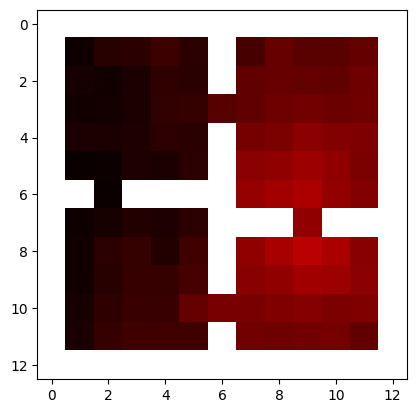

In [57]:
plt.imshow(arr6, cmap="hot")
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


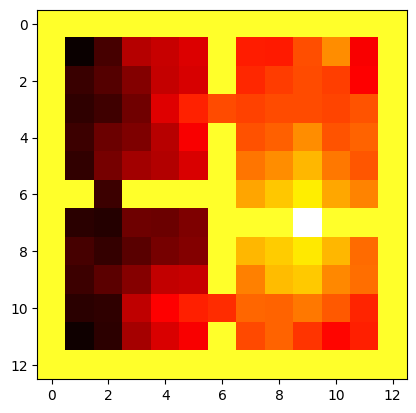

In [61]:
fig, ax = plt.subplots()

ims = [[ax.imshow(i, cmap="hot", animated=True)] for i in frames]
ims[0] = [ax.imshow(frames[0], cmap="hot")]
ani = ArtistAnimation(fig, ims, blit=True,
                                repeat_delay=2000, interval=1000)

ani.save("a.gif")

0.7931028604507446
